### Logistic Regression

In [9]:
import pandas as pd
import numpy as np

In [17]:
data = pd.DataFrame({'input':[-5,-4,-3,-2,-1,0,1,2,3,4,5],
                    'output':[-10,-8,-6,-4,-2,0,2,4,6,8,10]})

In [23]:
reg_eq = 2 * data['input']   # Normal Linear 

In [19]:
#Sigmoid function
data['output1'] = 1/(1+np.exp(-data['input']))

In [20]:
data

,input,output,output1
0,-5,-10,0.006693
1,-4,-8,0.017986
2,-3,-6,0.047426
3,-2,-4,0.119203
4,-1,-2,0.268941
5,0,0,0.500000
6,1,2,0.731059
7,2,4,0.880797
8,3,6,0.952574
9,4,8,0.982014


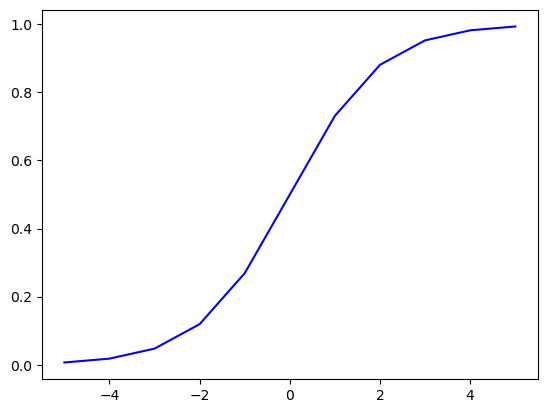

In [21]:
import matplotlib.pyplot as plt
plt.plot(data['input'], data['output1'],color='blue',label='Sigmoid Line')        # y = 1 / (1 + e^(-2x)) (sigmoid)

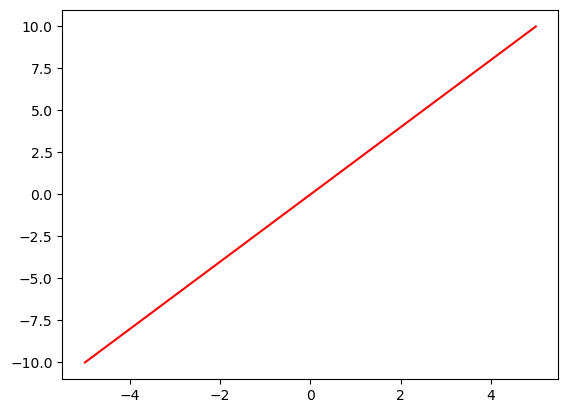

In [22]:
plt.plot(data['input'], data['output'],color='red',label='Regression Line')            # Y = 2x Graph    (Linear)

In [24]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Loading iris data
iris = load_iris()
iris_data = iris.data

In [26]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
target = iris.target   # different classes of flowers based on the features (Assume Target = input)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, target, test_size=0.33, random_state= 42)    # Train Test Split

In [30]:
model = LogisticRegression()                             # Logistic Regression 

In [32]:
model.fit(x_train,y_train)                               # Tarining the model

LogisticRegression()

In [33]:
y_pred = model.predict(x_test)                 # Prediction 

In [34]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [35]:
y_test                                         # Test data

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [37]:
accuracy_score(y_test,y_pred)                   # Accuracy

1.0

In [38]:
print(classification_report(y_test,y_pred))   # support shows the number of samples (All evalution Matrics values at once)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [39]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_test,y_pred))                 # Confusion matrics
cm = confusion_matrix(y_test,y_pred)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [42]:
# We have total 3 types of lebel data (0,1,2)
class_index = 0

In [43]:
tp = cm[0,0]                                      # (Test Case, Machine Predicted)

In [44]:
tp

19

In [45]:
fp = cm[:,class_index].sum()-tp                   # Total Zeros - Ture positive

In [46]:
fp

0

In [47]:
fn = cm[class_index,:].sum()-tp                  

In [48]:
fn

0

In [49]:
tn = cm[class_index,:].sum()-tp

In [50]:
tn

0